<h2>Importing Necessary Library</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Loading Preprocessed Dataset</h2>

In [2]:
df=pd.read_csv('clean_df')

In [3]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,45,42.30,1840.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,2,70.70,151.65,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1


<h1>Modeling Process Starts</h1>

<h2>Separating the Features and Labels</h2>

In [4]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [5]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,42.30,1840.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,2,70.70,151.65,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [6]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [7]:
X.shape,y.shape

((7032, 19), (7032,))

<h1>Feature Selection Step</h1>

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # You can choose a different scoring function

In [9]:
# selects the feature which has more correlation
selector = SelectKBest(score_func=f_classif, k=13) # k=13 default
X_select = selector.fit_transform(X, y)

In [10]:
selected_feature_indices = selector.get_support(indices=True)

In [11]:
selected_feature_indices

array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 15, 16, 17, 18], dtype=int64)

In [12]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [13]:
X.shape

(7032, 19)

<h1>Inference:</h1>

So, the 13 features which got selected are as follows: 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity','StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod'.

In [14]:
X_imp=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity','StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']]

In [15]:
X_imp.head()

,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,34,56.95,1889.50,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,53.85,108.15,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,42.30,1840.75,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2,70.70,151.65,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [16]:
X_imp.shape

(7032, 13)

<h2>Splitting data into Training and Test set:</h2>

Splitting a dataset into a training set and a test set is a critical step in the process of developing machine learning models. This division allows you to train your model on one portion of the data and then evaluate its performance on another independent portion. This separation helps assess how well your model generalizes to new, unseen data and helps prevent overfitting, which is when a model performs well on the training data but poorly on new data.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2)

In [19]:
print('\n Shape of X_train set is:',X_train.shape,'\n','Shape of X_test set is:', X_test.shape, '\n','Shape of y_train set is:', y_train.shape, '\n','Shape of y_test set is:', y_test.shape)


 Shape of X_train set is: (5625, 13) 
 Shape of X_test set is: (1407, 13) 
 Shape of y_train set is: (5625,) 
 Shape of y_test set is: (1407,)


In [20]:
y_test.value_counts()

0    1009
1     398
Name: Churn, dtype: int64

In [21]:
X_train.shape, X_test.shape

((5625, 13), (1407, 13))

<h1>Model Training Starts</h1>

<h1>1. Logistic Model</h1>

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel=LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

LogisticRegression()

<h1>2. K-Nearest Neighbors (KNN) Model</h1>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

<h2>A. For 5 Neighbors</h2>

In [26]:
knnmodel1=KNeighborsClassifier(n_neighbors=5)

In [27]:
knnmodel1.fit(X_train,y_train)

KNeighborsClassifier()

<h2>B. For 20 Neighbors</h2>

In [28]:
knnmodel2=KNeighborsClassifier(n_neighbors=20)

In [29]:
knnmodel2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

<h2>C. For 100 Neighbors</h2>

In [30]:
knnmodel3=KNeighborsClassifier(n_neighbors=100)

In [31]:
knnmodel3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

<h1>3. Support Vector Machine (SVM) Model</h1>

In [32]:
from sklearn.svm import SVC

<h2>With Linear Kernel</h2>

In [33]:
svm1=SVC(kernel='linear')

In [34]:
svm1.fit(X_train,y_train)

SVC(kernel='linear')

<h1>4. Random Forest Model</h1>

In [35]:
from sklearn.ensemble import RandomForestClassifier

<h2>A. For 5 Estimators</h2>

In [36]:
rf1=RandomForestClassifier(n_estimators=5,max_features='auto', random_state=101)

In [37]:
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=101)

<h2>B. For 20 Estimators</h2>

In [38]:
rf2=RandomForestClassifier(n_estimators=20,max_features='auto',random_state=101)

In [39]:
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=101)

<h2>C. For 100 Estimators</h2>

In [40]:
rf3=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)

In [41]:
rf3.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

<h1>5. Gradient Boost Classifier</h1>

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbmodel=GradientBoostingClassifier()

In [44]:
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier()

<h1>6. XGBoost Classifier</h1>

In [45]:
import xgboost as xgb

In [46]:
xgmodel = xgb.XGBClassifier()

In [47]:
xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<h1>Performance Evaluation of Each Models</h1>

<h2>Importing Model Performance Metrics</h2>

Performance metrics are quantitative measures used to assess the effectiveness and quality of machine learning models, algorithms, or systems. They provide a way to evaluate how well a model is performing its intended task by comparing its predictions or classifications against actual ground truth values. Different tasks, such as classification, regression, and clustering, require different performance metrics tailored to their specific objectives.

In [48]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

<h2>User-Defined function for Evaluation</h2>

For evaluating the performance of each model we'll create a user defined function which will take model and predict its performance on the basisc of accuracy_score,precision,recall and f1_score

In [49]:
def evaluate_performance(model):
    preds=model.predict(X_test)  
    plt.figure(figsize=(10,9),dpi=200)
    print("This is accuracy score for this model:", accuracy_score(y_test,preds)) #this will give us accuracy_score
    print('\n')
    print('This is Classification Report for this model:\n',classification_report(y_test,preds)) #this will give us classification_report
    print('\n')
    print('This is Plot Confusion matrix for this model:')
    plot_confusion_matrix(model,X_test,y_test) #this will give us plot_confusion_matrix
    print('\n')
    print('This is ROC curve for this model:')
    plot_roc_curve(model,X_test,y_test) #plot_roc_curve
    print('\n')
    print('This is Precision_Recall_curve for this model:')
    plot_precision_recall_curve(model,X_test,y_test) #plot_roc_curve

<h1>Evaluating Model Performance</h1>

<h1>1. Logistic Model</h1>

This is accuracy score for this model: 0.7732764747690121


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1009
           1       0.65      0.44      0.52       398

    accuracy                           0.77      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

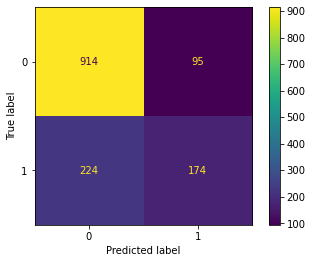

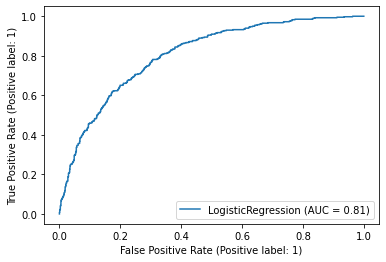

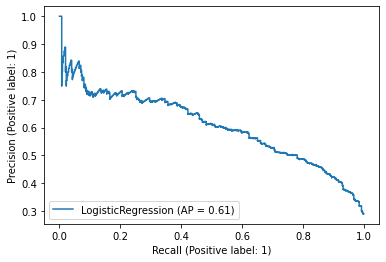

In [50]:
evaluate_performance(logmodel)

<h1>2. K-Nearest Neighbors (KNN) Model</h1>

<h1>A. For 5 Neighbors</h1>

This is accuracy score for this model: 0.7583511016346838


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1009
           1       0.60      0.42      0.50       398

    accuracy                           0.76      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.74      0.76      0.74      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

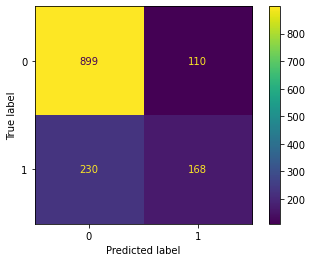

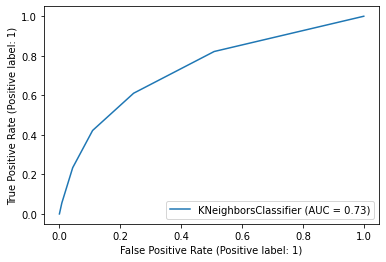

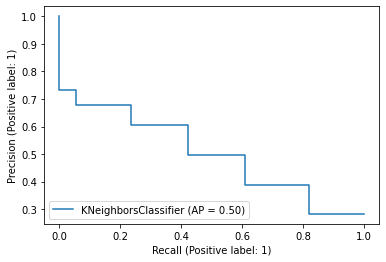

In [51]:
evaluate_performance(knnmodel1)

<h1>B. For 20 Neighbors</h1>

This is accuracy score for this model: 0.7611940298507462


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1009
           1       0.65      0.34      0.44       398

    accuracy                           0.76      1407
   macro avg       0.72      0.63      0.65      1407
weighted avg       0.74      0.76      0.73      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

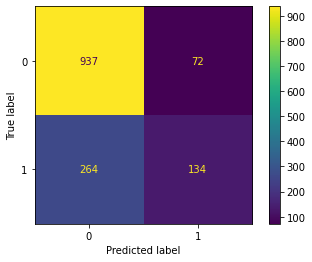

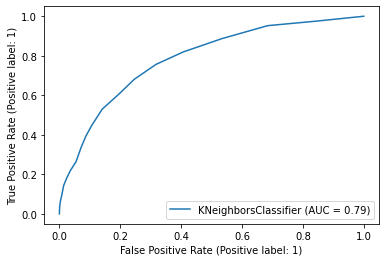

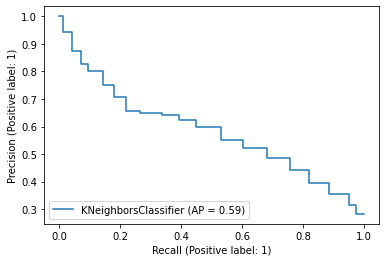

In [52]:
evaluate_performance(knnmodel2)

<h1>C. For 100 Neighbors</h1>

This is accuracy score for this model: 0.7540867093105899


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      1009
           1       0.69      0.24      0.35       398

    accuracy                           0.75      1407
   macro avg       0.72      0.60      0.60      1407
weighted avg       0.74      0.75      0.71      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

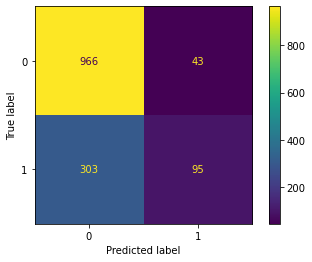

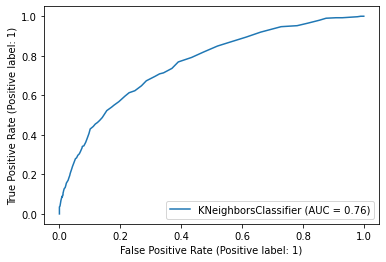

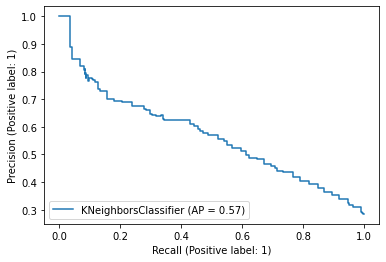

In [53]:
evaluate_performance(knnmodel3)

<h1>3. Support Vector Machine (SVM) Model</h1>

<h2>With Linear Kernel</h2>

This is accuracy score for this model: 0.7711442786069652


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1009
           1       0.66      0.40      0.50       398

    accuracy                           0.77      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.76      0.77      0.75      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

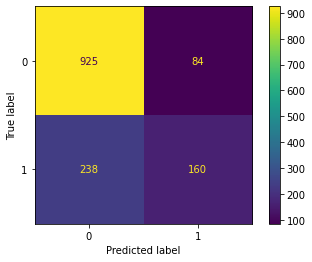

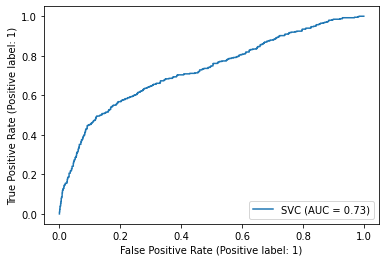

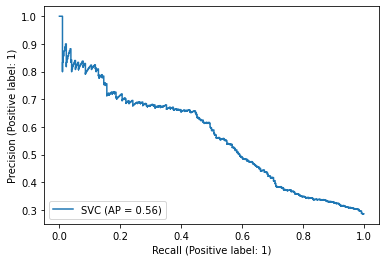

In [54]:
evaluate_performance(svm1)

<h1>4. Random Forest Model</h1>

<h2>A. For 5 Estimators</h2>

This is accuracy score for this model: 0.7448471926083866


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1009
           1       0.56      0.44      0.50       398

    accuracy                           0.74      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.73      0.74      0.73      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

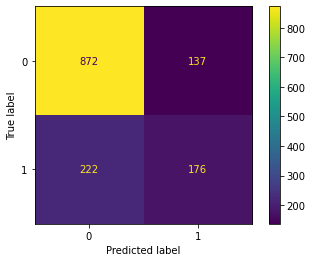

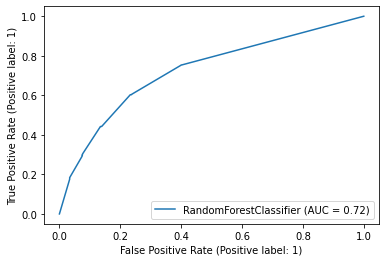

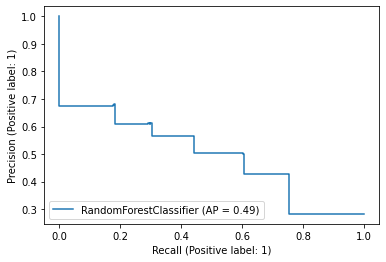

In [55]:
evaluate_performance(rf1)

<h2>B. For 20 Estimators</h2>

This is accuracy score for this model: 0.7611940298507462


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1009
           1       0.61      0.43      0.51       398

    accuracy                           0.76      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

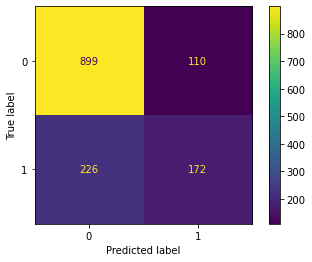

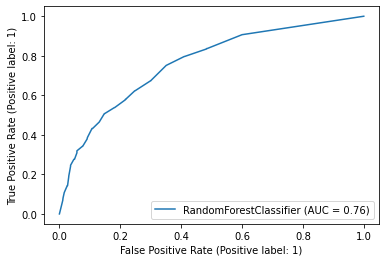

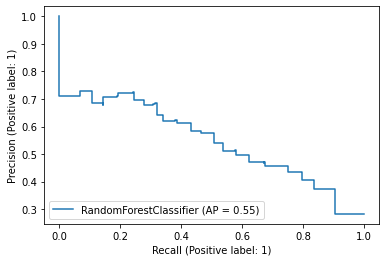

In [56]:
evaluate_performance(rf2)

<h2>C. For 100 Estimators</h2>

This is accuracy score for this model: 0.7547974413646056


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1009
           1       0.59      0.45      0.51       398

    accuracy                           0.75      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.74      0.75      0.74      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

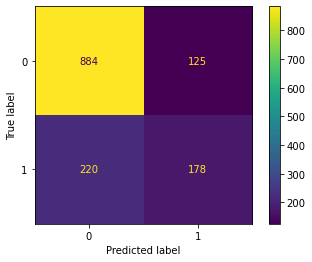

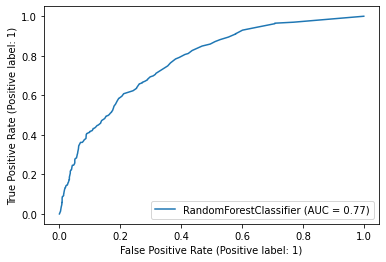

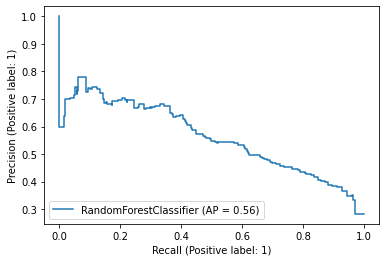

In [57]:
evaluate_performance(rf3)

<h1>5. Gradient Boost Classifier</h1>

This is accuracy score for this model: 0.7746979388770433


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1009
           1       0.64      0.46      0.54       398

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

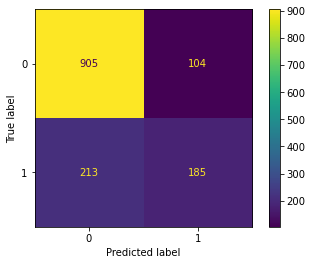

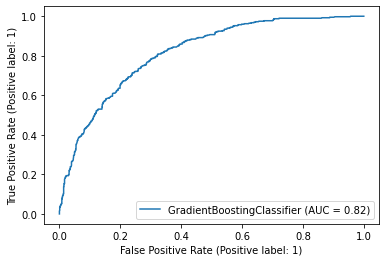

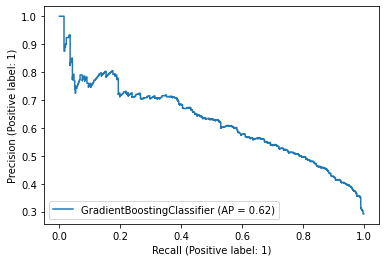

In [58]:
evaluate_performance(gbmodel)

<h1>6. XGBoost Classifier</h1>

This is accuracy score for this model: 0.7569296375266524


This is Classification Report for this model:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1009
           1       0.60      0.43      0.50       398

    accuracy                           0.76      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.74      0.76      0.74      1407



This is Plot Confusion matrix for this model:


This is ROC curve for this model:


This is Precision_Recall_curve for this model:


<Figure size 2000x1800 with 0 Axes>

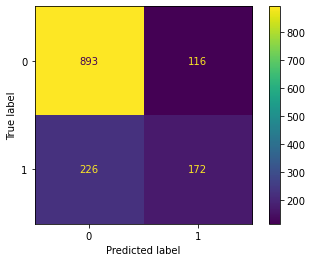

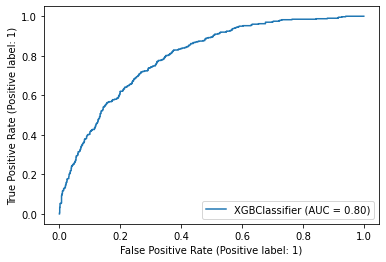

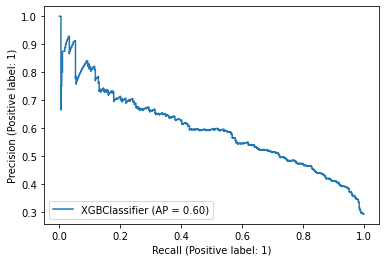

In [59]:
evaluate_performance(xgmodel)

<H2>Compairing Performance All The Models Used</H2>

We will compare all the models used on the basis of their accuracy score, precision score, f1 score, TP,TN,FP,FN, area under the curve of roc and precision recall curve. After we have compared all the models on the mentioned metrices we'll find a final model which will be most efficient model from the models we have used till now. After we have found our this final model then we will GridSearchCV to see if we can further improve on this model or not.

The given below is the performace values of each model for comparison:

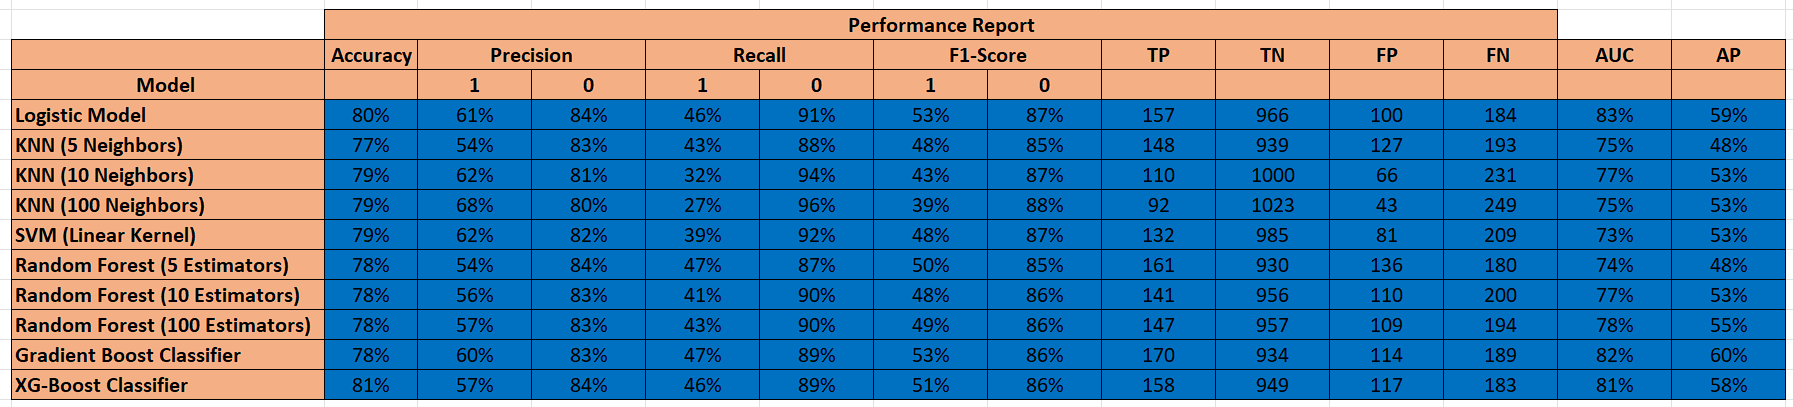

<h2>Conclusion:</h2>

Looking overall values of accuracy score, precision score, recall value, f1 score, TP,TN,FP,FN, area under the roc curve and precision recall curve we conclude that the XGBoost Classifier is most efficient classifier among all the classifier we have used for classification of whether a person is having a heart disease or not. Logistic Regression is also giving good values for the performances but the FN given XGBoost is lesser that is the reason we are choosing XGBoost classifier as the most efficient classifier.

<h1>Feature Importances</h1>

In simple words, feature importance tells us how crucial each ingredient (or feature) is in a recipe (or a model) to make it taste good (or perform well). Just like some ingredients are more important in making a dish delicious, some features are more important in making a model more accurate. Feature importance helps us figure out which parts of the recipe (or data) we should pay the most attention to.

in more professional terms feature importance refers to a technique in machine learning that quantifies the contribution of individual input features (variables) to the model's predictive performance. It helps us identify which features have a more significant impact on the model's output. Feature importance can be determined using various methods, including tree-based models like Random Forest, which assess the reduction in model performance when a specific feature is excluded from the analysis. Features that lead to more substantial performance drops when omitted are considered more important.

<H2>Checking Feature Importances:</H2>

In [67]:
feature_importances = rf1.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_imp.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

             Feature  Importance
2       TotalCharges    0.327913
1     MonthlyCharges    0.293308
0             tenure    0.213992
12     PaymentMethod    0.047322
11  PaperlessBilling    0.033827
10          Contract    0.019085
9    StreamingMovies    0.013900
5       PhoneService    0.009973
3            Partner    0.009382
4         Dependents    0.009129
8     OnlineSecurity    0.007971
7    InternetService    0.007489
6      MultipleLines    0.006711


<h2>Plot feature importances</h2>

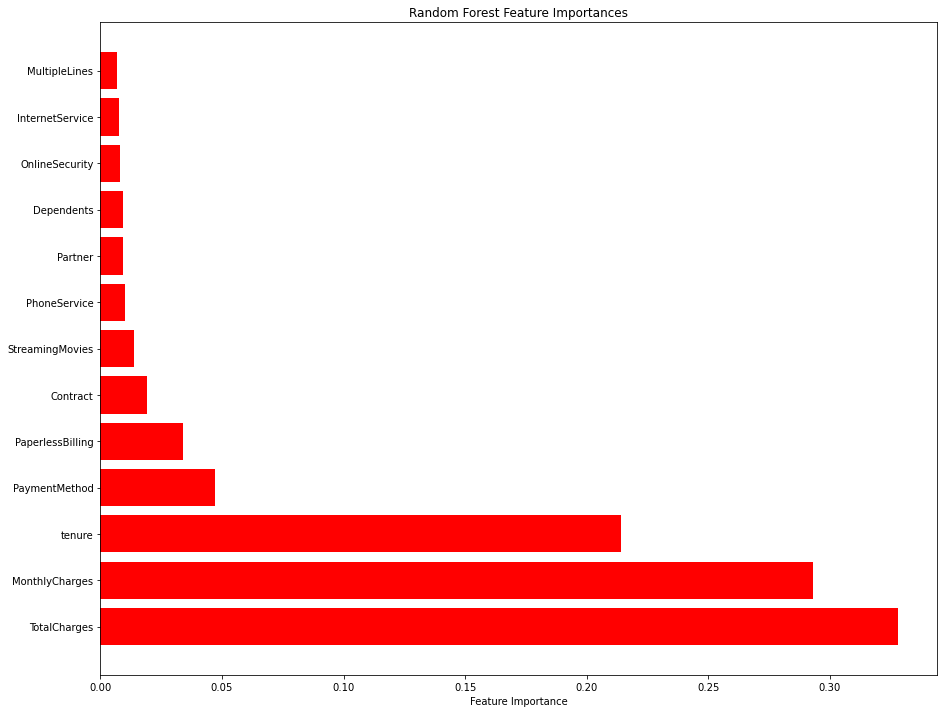

In [69]:
plt.figure(figsize=(15, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='red')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

<h2>Inference:</h2>
    
From the above feature importances plot we can clearly infer that TotalCharges feature column is the most important feature in predicting y (whether the customer will churn or not). The next most important feature is MonthlyCharges and the least important feature in predicting churn is Multiplelines.

<h1>Final Verdict:</h1>
    
XGBoost Classifier is the best fit machine learning model for this dataset. TotalCharges and MonthlyCharges are two of the most influencing feature of dataset in predicting whether the person will churn or not the subscription. So, the Company (Liike Neflix or Amazon) should focus more on Total and Monthly Charges or reduce these two quantities accordingly to reduce the number of people who are churning. And the company should focus less on features like Multiple Lines or Internet Services because they are not contributing much in influencing the target variable.